<a href="https://colab.research.google.com/github/vinodgaitonde/Assignments/blob/main/Calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 2: Calculus - Gradient Descent for Linear Regression  

### Problem Statement
Implement a basic gradient descent algorithm to solve a linear regression problem. You will need to:

1. Generate synthetic data (Already done)
2. Implement the cost function
3. Implement the gradient descent algorithm
4. Visualize the convergence of the algorithm

<div>
  <a href="https://colab.research.google.com/github/emharsha1812/CCE_Assignment/blob/main/Assignments/Calculus.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
  </a>
</div>

### Task 1.0 Generating Synthetic Data (Already done)


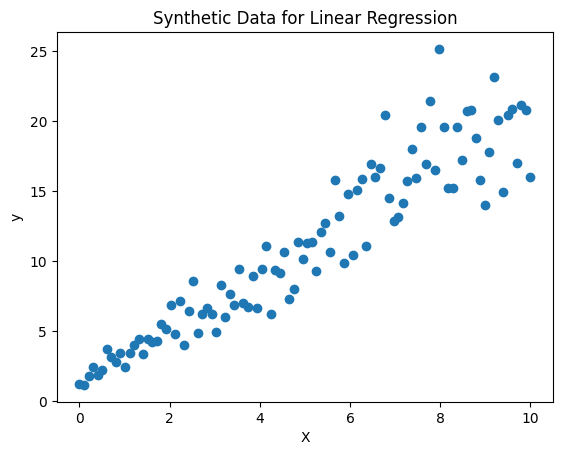

In [ ]:
#We've provided the code to generate sample data for linear regression. You do NOT need to modify this section.

import numpy as np
import matplotlib.pyplot as plt

## Task 1: Implement Gradient Descent for Linear Regression

### 1.1 Generate Sample Data

def generate_data(n_samples=100, noise=0.5):
    np.random.seed(42)
    X = np.linspace(0, 10, n_samples).reshape(-1, 1)
    y = 2 * X + 1 + np.random.normal(0, noise, (n_samples, 1))

    # Add some non-linear noise
    y += 0.5 * np.sin(X) + 0.4 * np.random.randn(n_samples, 1) * X

    return X, y

X, y = generate_data()

plt.scatter(X, y)
plt.title('Synthetic Data for Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Task 1.1 Compute the cost function for linear regression.
Hint - Use MSE. Please try to implement MSE by yourself rather than importing from libraries.

In [ ]:
def compute_cost(X, y, w, b):
    #Compute the cost function for linear regression.

    #Args:
    #X (numpy.ndarray): Input features
    #y (numpy.ndarray): Target values
    #w (float): Weight
    #b (float): Bias

    m=X.shape[0]

    # predicted values
    predict_val = np.dot(X,w)+b

    # MSE
    Cost = (1/(2*m)) *np.sum((predict_val-y)**2)

    #Returns:
    #float: Cost
    return Cost

Cost = compute_cost(X,y,0.5,2)
print(Cost)
    # TODO: Implement the cost function
    # Hint: Use Mean Squared Error (MSE)
    #pass



33.22591968320416


### Task 1.2 Implement Gradient Computation

In [ ]:
def compute_gradient(X, y, w, b):
    #Compute the gradient of the cost function.

    #Args:
    #X (numpy.ndarray): Input features
    #y (numpy.ndarray): Target values
    #w (float): Weight
    #b (float): Bias

    m,n = X.shape

    # Predicted values
    predict_val = np.dot(X,w)+b

    # Residuals
    residuals = predict_val-y

    # Compute gradient wrt w
    dw = (1/m) * np.dot(X.T, residuals)

    # Compute gradient wrt b
    db = (1/m) * np.sum(residuals)

    #Returns:
    #tuple: (dw, db) - gradients of w and b

    return dw,db

dw,db = compute_gradient(X,y,0.5,2)
print(dw)
print(db)
    # TODO: Implement the gradient computation
    # Hint: Compute partial derivatives of the cost function with respect to w and b
    #pass

[[-45.51984552]]
-6.589141747244533


### Task 1.3 Implement gradient descent

TODO: Implement the cost function for linear regression  
TODO: Implement the gradient of the cost function  
TODO: Implement the gradient descent algorithm


In [ ]:
def gradient_descent(X, y, learning_rate=0.01, n_iterations=10):
    #Perform gradient descent for linear regression.

    #Args:
    #X (numpy.ndarray): Input features
    #y (numpy.ndarray): Target values
    #learning_rate (float): Learning rate for gradient descent
    #n_iterations (int): Number of iterations

    m, n = X.shape
    w = 0  # Initialize w -> 0
    b = 0  # Initialize b -> 0
    costs = []

    for i in range(n_iterations):
        # Compute the gradients
        dw, db = compute_gradient(X, y, w, b)

        # Update the weights and bias
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Compute the cost and save it for later analysis
        cost = compute_cost(X, y, w, b)
        costs.append(cost)

        # Optional: Print the cost at every iteration
        if i % 1 == 0:  # You can change the print frequency
            print(f"Iteration {i}: cost = {cost}")

    return w, b, costs

    # TODO: Implement the gradient descent algorithm
    # Hint: Use the compute_cost and compute_gradient functions
    # Write code below
    #    cost=None #Change this
    #    if i % 1 == 0:
    #        print(f"Iteration {i}: cost = {cost}")

    #Returns:
    #tuple: Final weights (w, b) and list of costs
    #pass

Iteration 0: cost = 36.04753389388363
Iteration 1: cost = 16.896264867984254
Iteration 2: cost = 8.617658277268202
Iteration 3: cost = 5.038874780917059
Iteration 4: cost = 3.491640177460169
Iteration 5: cost = 2.8225651035494916
Iteration 6: cost = 2.533084969122855
Iteration 7: cost = 2.407690022971901
Iteration 8: cost = 2.3532239205997465
Iteration 9: cost = 2.329418853878299


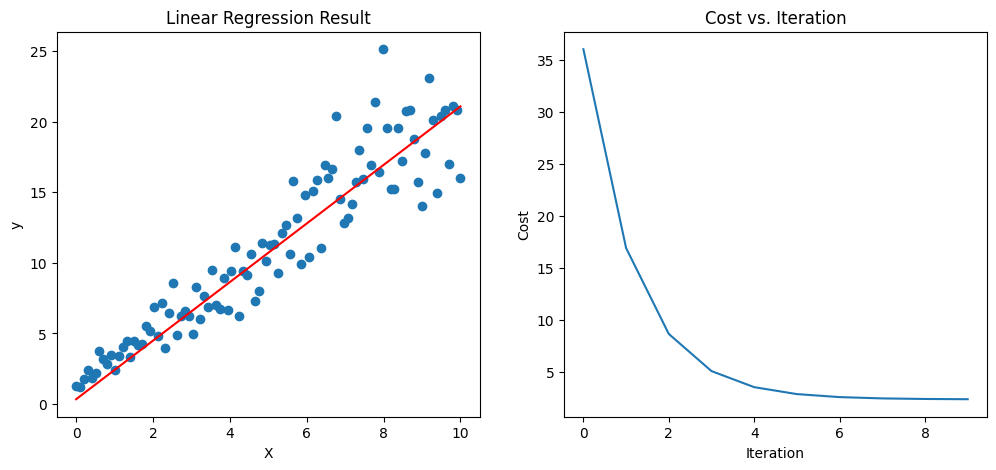

Final parameters: w = [[2.0757429]], b = 0.3341130004763095


In [ ]:
### 1.5 Visualize the Results

w, b, costs = gradient_descent(X, y)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y)
plt.plot(X, w*X + b, color='red')
plt.title('Linear Regression Result')
plt.xlabel('X')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.plot(costs)
plt.title('Cost vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

print(f"Final parameters: w = {w}, b = {b}")
